In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
## Convert kitti_to_coco using https://github.com/xingyizhou/CenterNet/blob/master/readme/DATA.md#kitti
## symlink the directory of kitti to datapath 
## ln -sr <kitti path> /home/paritosh/Desktop/SEM2/16824/code/vlr-project/vis_det/vis_det/data

In [27]:
import os
import json
import cv2
import numpy as np
import time
from progress.bar import Bar
import torch

from vis_det.model_pool.centernet.external.nms import soft_nms
from vis_det.model_pool.centernet.opts import opts
from vis_det.model_pool.centernet.datasets.dataset_factory import dataset_factory
from vis_det.model_pool.centernet.detectors.detector_factory import detector_factory

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
opt = opts().parse()
opt.debug = max(opt.debug, 1)
Dataset = dataset_factory[opt.dataset]
opt = opts().update_dataset_info_and_set_heads(opt, Dataset)
Detector = detector_factory[opt.task]
split = 'val' if not opt.trainval else 'test'

Fix size testing.
training chunk_sizes: [1]
The output will be saved to  /home/paritosh/Desktop/SEM2/16824/code/vlr-project/vis_det/vis_det/model_pool/centernet/../../exp/ddd/default
heads {'hm': 3, 'dep': 1, 'rot': 8, 'dim': 3, 'wh': 2, 'reg': 2}


In [63]:
dataset = Dataset(opt, split)
detector = Detector(opt)

==> initializing kitti 3dop, val data.
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
Loaded val 3769 samples
Creating model...
loaded /data/datasets/paritosh/16824/centernet/ddd_3dop.pth, epoch 70


In [58]:
plt.rcParams['figure.figsize'] = [20, 10]

In [59]:
num_iters = len(dataset)

In [64]:
ind = 10 # len(num_iters)
img_id = dataset.images[ind]
img_info = dataset.coco.loadImgs(ids=[img_id])[0]
img_path = os.path.join(dataset.img_dir, img_info['file_name'])

Here Shubham!! What u doing man


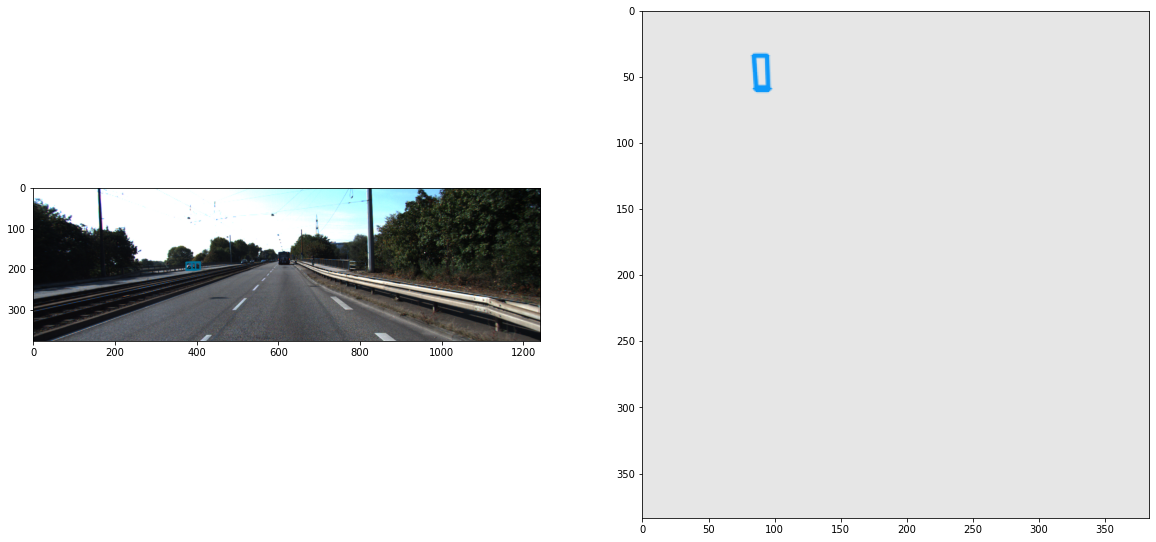

In [65]:
ret = detector.run(img_path, img_info['calib'])

In [9]:
ret

{'results': {1: array([], shape=(0, 13), dtype=float32),
  2: array([[-1.5159800e+00,  6.6108630e+02,  1.9218423e+02,  7.0335913e+02,
           2.2432410e+02,  1.5211425e+00,  1.6695979e+00,  4.2057238e+00,
           3.9454932e+00,  2.7122517e+00,  3.9769760e+01, -1.4156121e+00,
           3.9790586e-01]], dtype=float32),
  3: array([], shape=(0, 13), dtype=float32)},
 'tot': 0.5272235870361328,
 'load': 0.008848190307617188,
 'pre': 0.009951353073120117,
 'net': 0.5021886825561523,
 'dec': 0.001695394515991211,
 'post': 0.004507541656494141,
 'merge': 2.956390380859375e-05}

In [38]:
ret["results"]

{1: array([], shape=(0, 13), dtype=float32),
 2: array([[  1.8013018, 375.67767  , 181.61978  , 409.1891   , 202.86658  ,
           1.4729633,   1.6529558,   4.155544 , -16.968937 ,   2.246807 ,
          56.18836  ,   1.5090002,   0.8491567]], dtype=float32),
 3: array([], shape=(0, 13), dtype=float32)}

In [10]:
type(img_info['calib'])

list

In [11]:
img_info['calib']

[[721.5377197265625, 0.0, 609.559326171875, 44.85728073120117],
 [0.0, 721.5377197265625, 172.85400390625, 0.2163791060447693],
 [0.0, 0.0, 1.0, 0.0027458840049803257]]

In [39]:
image = cv2.imread(img_path)